# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
%matplotlib inline

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [3]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [4]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [5]:
# TODO: Aggregate data by year to create a 124-year time series
df_aggregated = df.groupby('Year').mean().reset_index()

# Display the first few rows of the aggregated dataset
print(df_aggregated.head(10))

   Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
0  1900                        14.506663               350.373405   
1  1901                        14.485343               349.757140   
2  1902                        14.476262               349.299686   
3  1903                        14.492360               349.644375   
4  1904                        14.494241               349.537032   
5  1905                        14.486222               349.768517   
6  1906                        14.501610               350.269288   
7  1907                        14.507352               349.707452   
8  1908                        14.489932               349.908538   
9  1909                        14.524320               349.477657   

   Sea Level Rise (mm)  Arctic Ice Area (million km²)  
0           150.408288                       8.978659  
1           150.548828                       8.947272  
2           152.174821                       9.035554  
3           150.

## 2. Univariate Analysis

Analyze each climate variable independently.

In [7]:
# Rename columns for easier access
df_aggregated.rename(columns={
    "Global Average Temperature (°C)": "Temperature",
    "CO2 Concentration (ppm)": "CO2",
    "Sea Level Rise (mm)": "Sea_Level",
    "Arctic Ice Area (million km²)": "Ice_Area"
}, inplace=True)

# Set style
#sns.set_style("whitegrid")

# List of variables for analysis
variables = ["Temperature", "CO2", "Sea_Level", "Ice_Area"]

# Descriptive Statistics
for column in variables:
    print(f"Descriptive Statistics for {column}:")
    print(df_aggregated[column].describe().round(2))
    print(f"Mean: {df_aggregated[column].mean():.2f}")
    print(f"Median: {df_aggregated[column].median():.2f}")
    print(f"Standard Deviation: {df_aggregated[column].std():.2f}")
    print(f"Minimum: {df_aggregated[column].min():.2f}")
    print(f"Maximum: {df_aggregated[column].max():.2f}")
    print("\n")





Descriptive Statistics for Temperature:
count    124.00
mean      14.50
std        0.01
min       14.47
25%       14.49
50%       14.50
75%       14.50
max       14.53
Name: Temperature, dtype: float64
Mean: 14.50
Median: 14.50
Standard Deviation: 0.01
Minimum: 14.47
Maximum: 14.53


Descriptive Statistics for CO2:
count    124.00
mean     350.03
std        0.46
min      348.64
25%      349.69
50%      350.02
75%      350.37
max      351.00
Name: CO2, dtype: float64
Mean: 350.03
Median: 350.02
Standard Deviation: 0.46
Minimum: 348.64
Maximum: 351.00


Descriptive Statistics for Sea_Level:
count    124.00
mean     149.99
std        1.03
min      148.05
25%      149.21
50%      149.92
75%      150.56
max      152.67
Name: Sea_Level, dtype: float64
Mean: 149.99
Median: 149.92
Standard Deviation: 1.03
Minimum: 148.05
Maximum: 152.67


Descriptive Statistics for Ice_Area:
count    124.00
mean       9.00
std        0.04
min        8.89
25%        8.98
50%        9.00
75%        9.03
max     

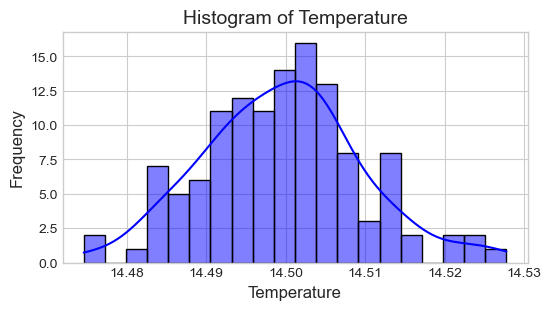

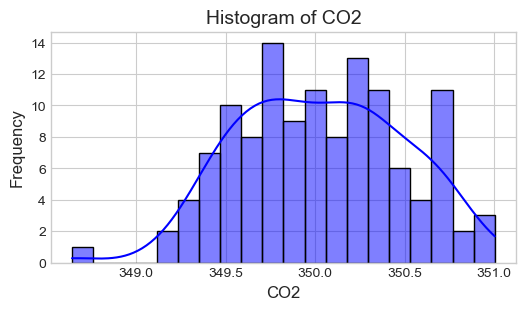

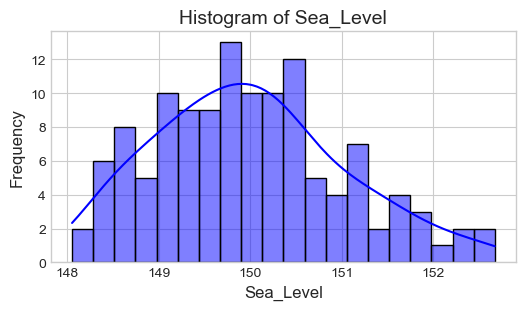

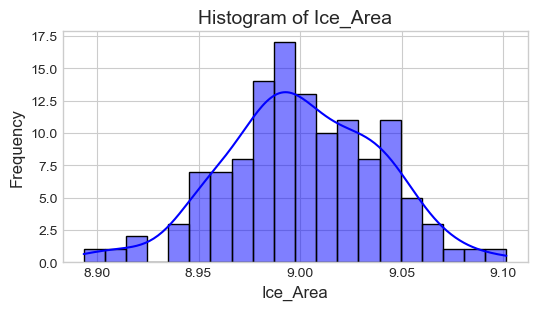

In [8]:
# Plot histograms
for column in variables:
    plt.figure(figsize=(6, 3))
    sns.histplot(df_aggregated[column], bins=20, kde=True, color="blue")
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.title(f"Histogram of {column}", fontsize=14)
    plt.show()

/var/folders/b3/_qnv83d10gzcyhls52ll3g3h0000gn/T/ipykernel_69510/1286379180.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_aggregated[column], palette='viridis', whis=1.5)


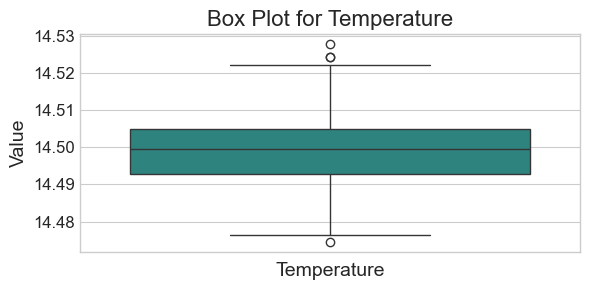

/var/folders/b3/_qnv83d10gzcyhls52ll3g3h0000gn/T/ipykernel_69510/1286379180.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_aggregated[column], palette='viridis', whis=1.5)


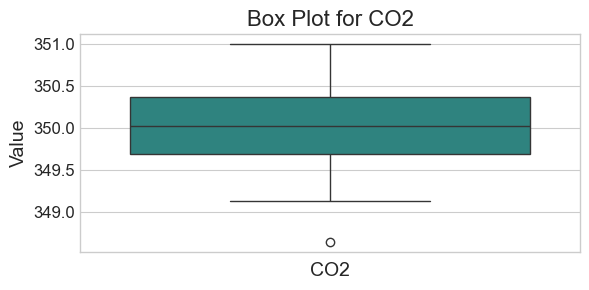

/var/folders/b3/_qnv83d10gzcyhls52ll3g3h0000gn/T/ipykernel_69510/1286379180.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_aggregated[column], palette='viridis', whis=1.5)


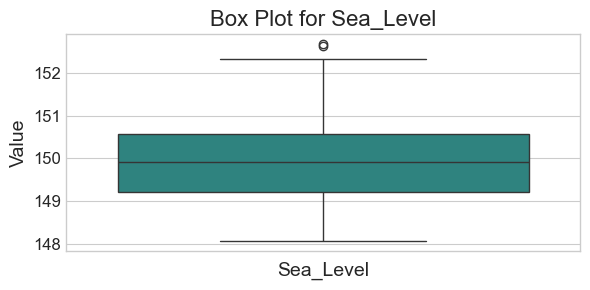

/var/folders/b3/_qnv83d10gzcyhls52ll3g3h0000gn/T/ipykernel_69510/1286379180.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_aggregated[column], palette='viridis', whis=1.5)


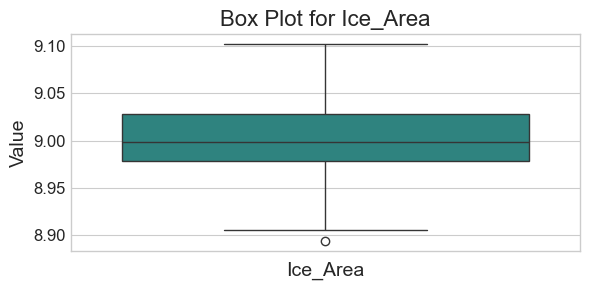

In [9]:
# Plot Boxplots
for column in variables:
    plt.figure(figsize=(6, 3))
    sns.boxplot(y=df_aggregated[column], palette='viridis', whis=1.5)
    plt.title(f'Box Plot for {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Value', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()



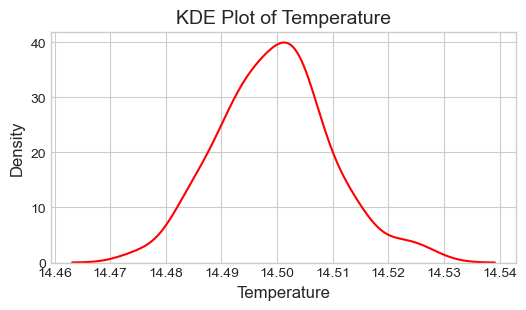

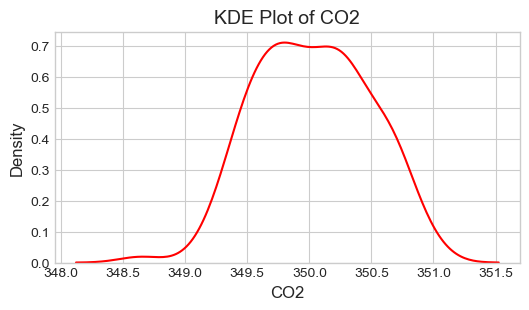

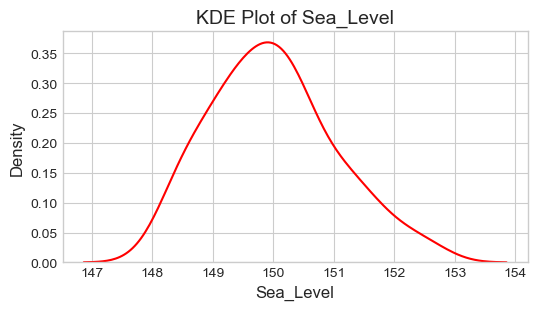

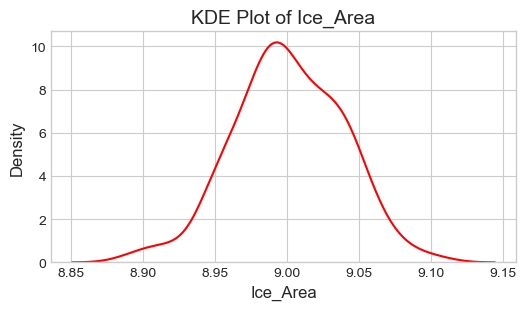

In [10]:
# Plot KDE plotss
for column in variables:
    plt.figure(figsize=(6, 3))
    sns.kdeplot(df_aggregated[column], color='red')
    plt.title(f'KDE Plot of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.show()



<Figure size 600x300 with 0 Axes>

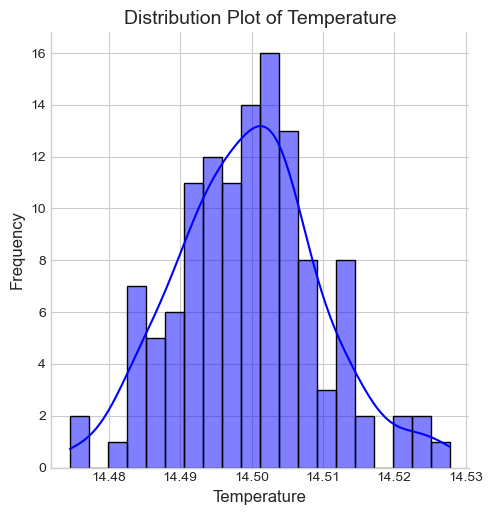

<Figure size 600x300 with 0 Axes>

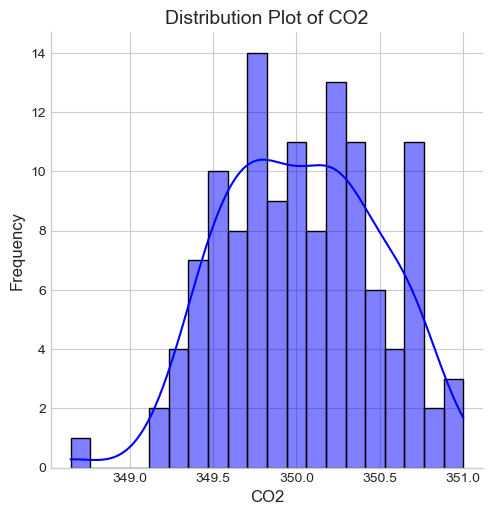

<Figure size 600x300 with 0 Axes>

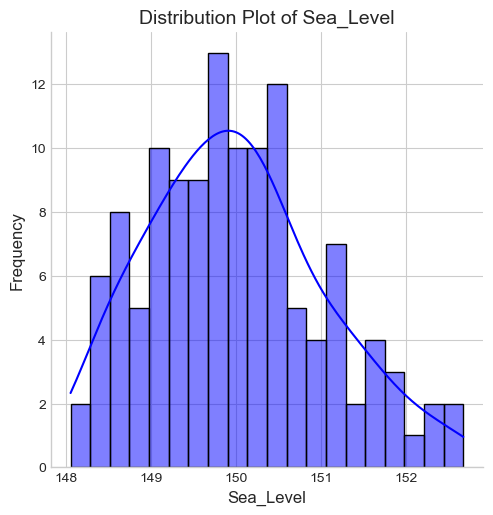

<Figure size 600x300 with 0 Axes>

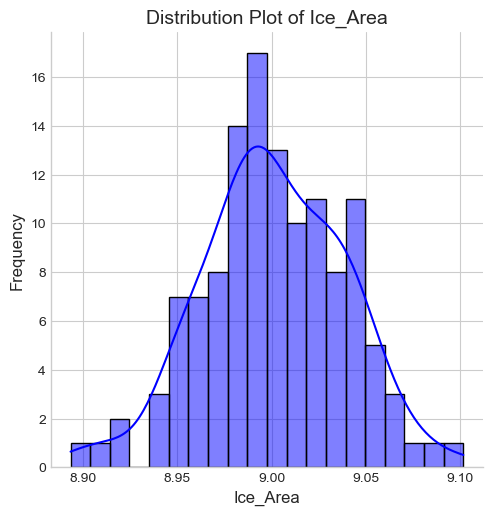

In [11]:
# Plot Distribution plots (displot)
for column in variables:
    plt.figure(figsize=(6, 3))
    sns.displot(df_aggregated[column], bins=20, kde=True, color="blue")
    plt.title(f'Distribution Plot of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

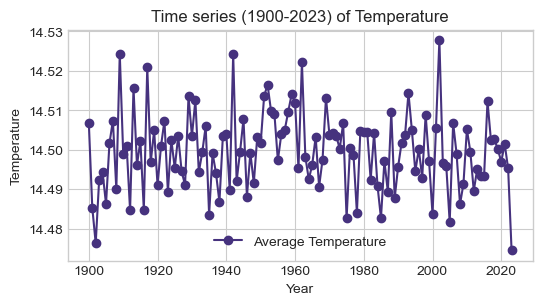

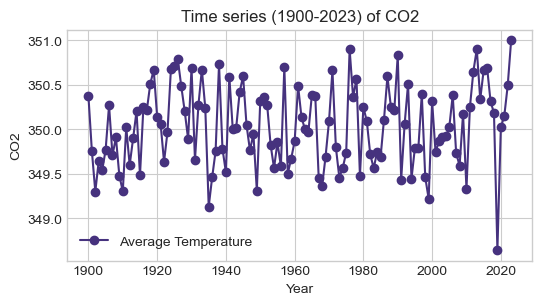

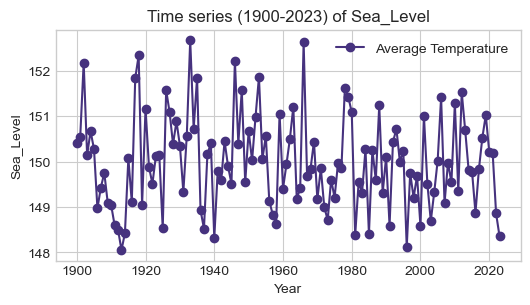

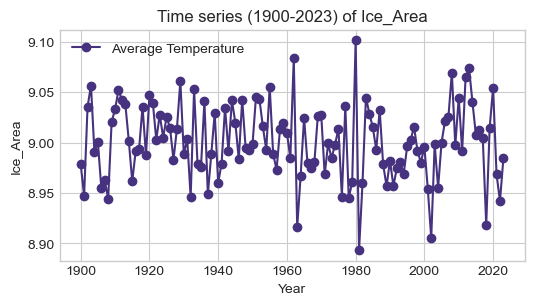

In [12]:
#Time series Analysis
for column in variables:
    plt.figure(figsize=(6, 3))
    plt.plot(df_aggregated["Year"], df_aggregated[column], marker='o', linestyle='-', label="Average Temperature")
    plt.xlabel("Year")
    plt.ylabel(column)
    plt.title(f"Time series (1900-2023) of {column}")
    plt.legend()
    plt.show()  

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

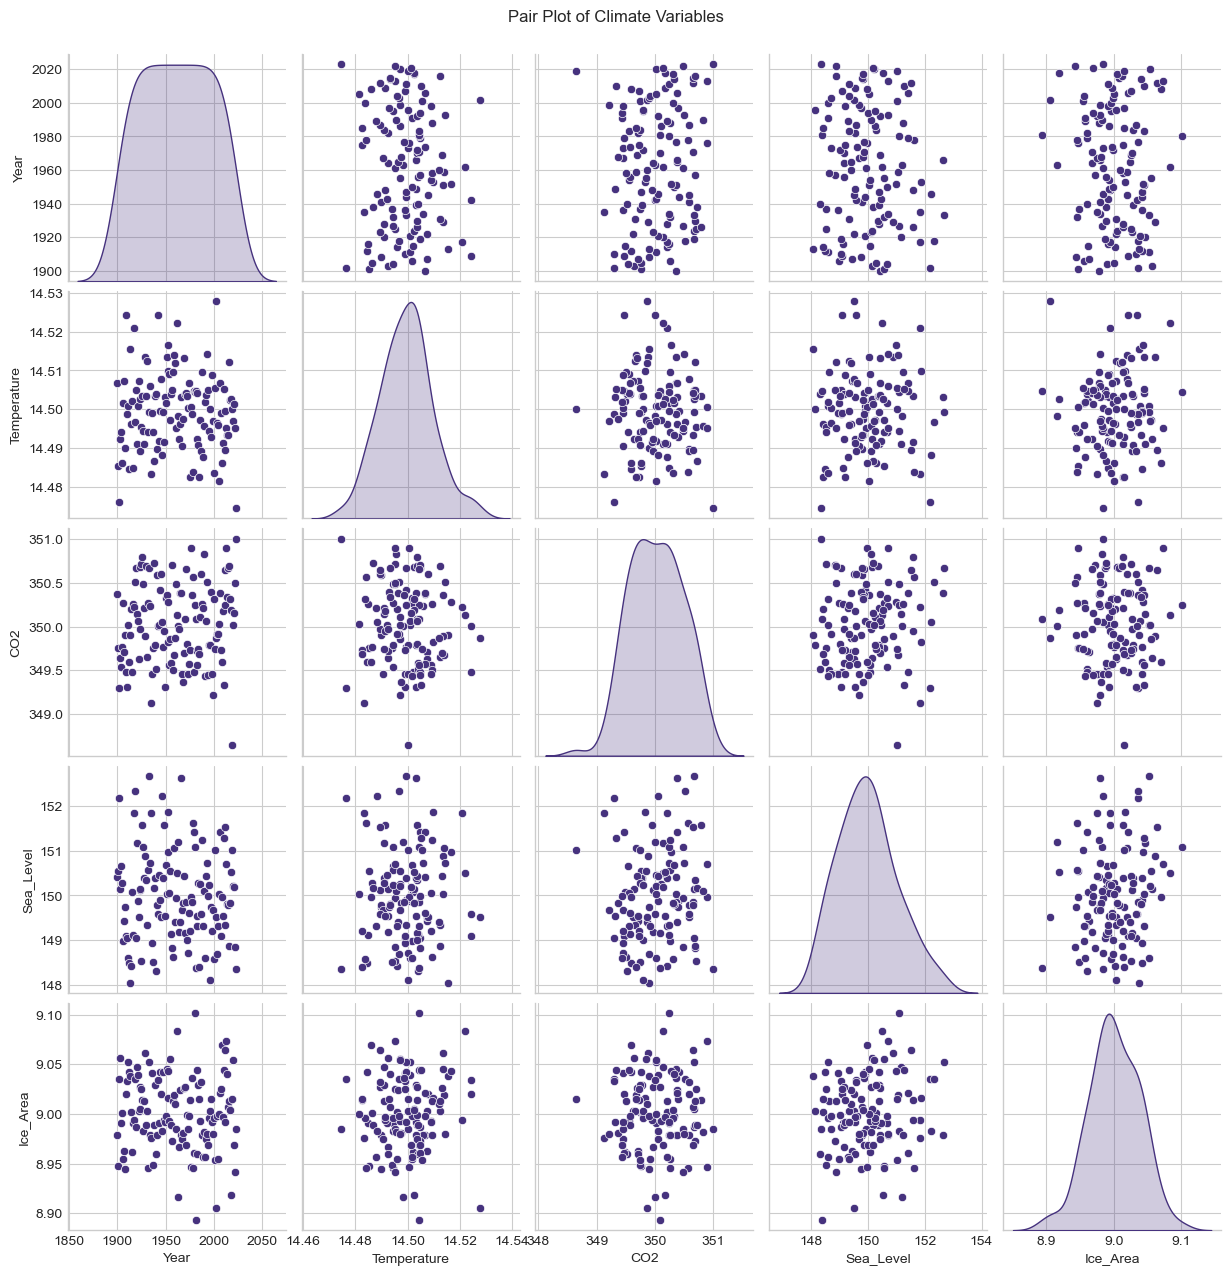

In [25]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# 1. Scatter plots for pairs of variables
sns.pairplot(df_aggregated, diag_kind='kde', markers='o')
plt.suptitle('Pair Plot of Climate Variables', y=1.02)
plt.show()

In [29]:
# 2. Compute correlation coefficients (excluding Year variable)
correlation_matrix = df_aggregated.drop(columns=['Year']).corr()
print("Correlation Coefficients:\n", correlation_matrix)


Correlation Coefficients:
              Temperature       CO2  Sea_Level  Ice_Area
Temperature     1.000000 -0.067980   0.003878  0.047027
CO2            -0.067980  1.000000   0.098212  0.009986
Sea_Level       0.003878  0.098212   1.000000  0.129528
Ice_Area        0.047027  0.009986   0.129528  1.000000


Interpretation
The correlation matrix for the climate dataset reveals the relationships between temperature, CO₂ levels, sea level, and ice area, excluding the "Year" variable. The key findings are:

Temperature vs. CO₂: The correlation coefficient is -0.0679, indicating a weak negative correlation. This suggests that an increase in CO₂ levels does not strongly affect temperature changes in the dataset.

Temperature vs. Sea Level: The correlation coefficient is 0.0039, implying almost no relationship between these variables.

Temperature vs. Ice Area: With a correlation of 0.0470, there is a very weak positive association, meaning changes in temperature have minimal impact on ice area in this dataset.

CO₂ vs. Sea Level: The correlation of 0.0982 suggests a slight positive relationship, meaning higher CO₂ levels are somewhat associated with rising sea levels.

CO₂ vs. Ice Area: The correlation is 0.0099, indicating almost no relationship between CO₂ levels and ice area.

Sea Level vs. Ice Area: A correlation of 0.1295 suggests a weak positive relationship, meaning as sea levels rise, ice area might slightly increase.

Interpretation
The correlation coefficients indicate that the relationships among these climate variables are relatively weak in this dataset. While we might expect stronger correlations between temperature and CO₂ or sea level and ice area due to climate change, other factors may influence these measurements

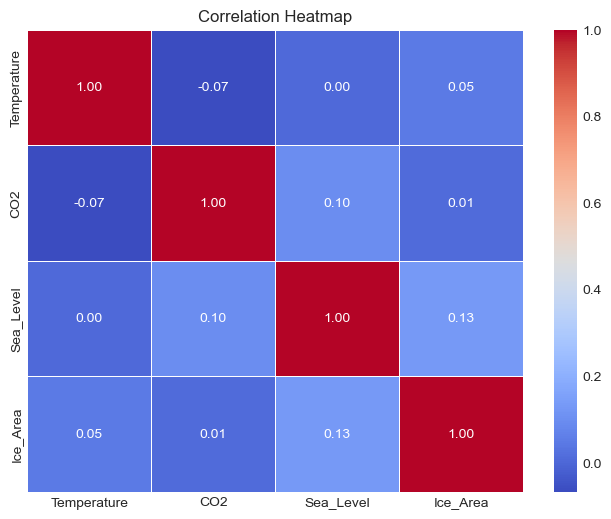

In [30]:
# 3. Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

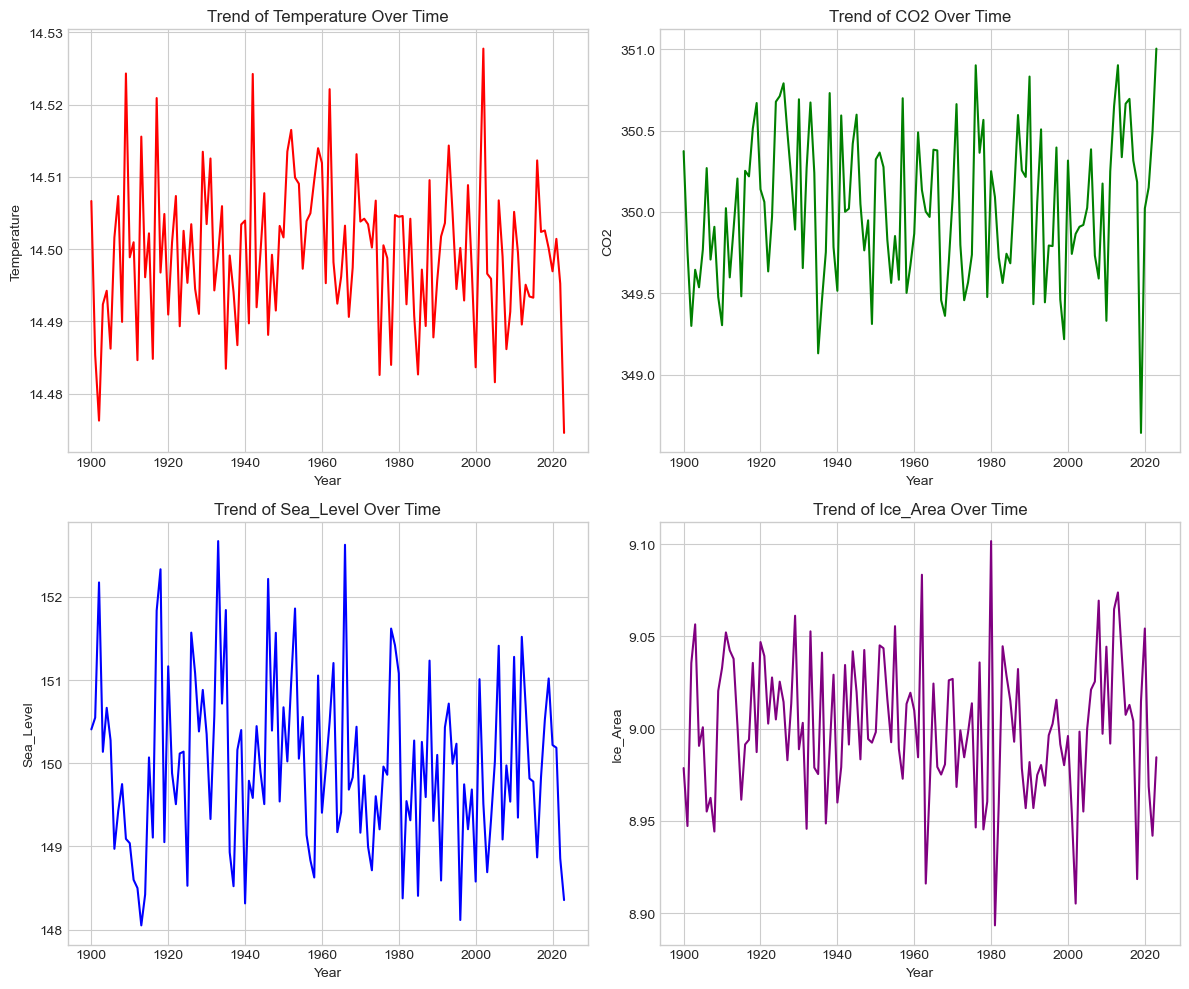

In [28]:

# 4. Line plots to analyze trends over time
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
variables = ['Temperature', 'CO2', 'Sea_Level', 'Ice_Area']
colors = ['r', 'g', 'b', 'purple']

for ax, var, color in zip(axes.flatten(), variables, colors):
    sns.lineplot(data=df_aggregated, x='Year', y=var, ax=ax, color=color)
    ax.set_title(f'Trend of {var} Over Time')
    ax.set_xlabel('Year')
    ax.set_ylabel(var)

plt.tight_layout()
plt.show()

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

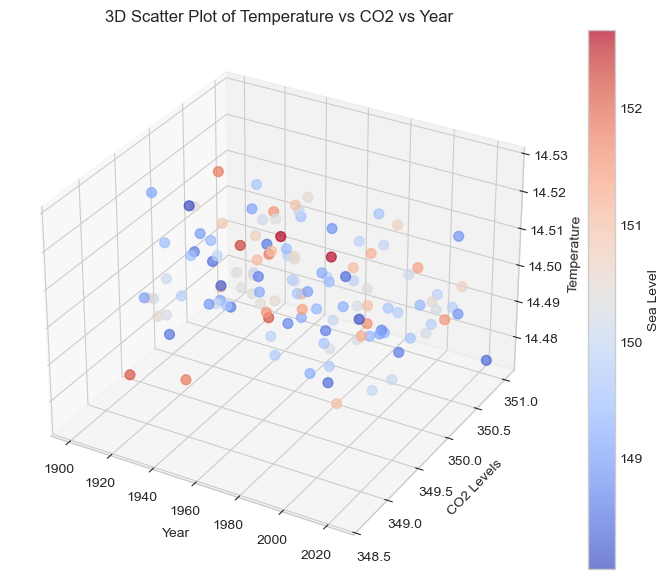

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D figure and subplot together
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw={"projection": "3d"})

# Scatter plot
sc = ax.scatter(df_aggregated['Year'], df_aggregated['CO2'], df_aggregated['Temperature'], 
                c=df_aggregated['Sea_Level'], cmap='coolwarm', s=50, alpha=0.7)

ax.set_xlabel('Year')
ax.set_ylabel('CO2 Levels')
ax.set_zlabel('Temperature')
ax.set_title('3D Scatter Plot of Temperature vs CO2 vs Year')

# Color bar
cbar = plt.colorbar(sc)
cbar.set_label('Sea Level')

plt.show()




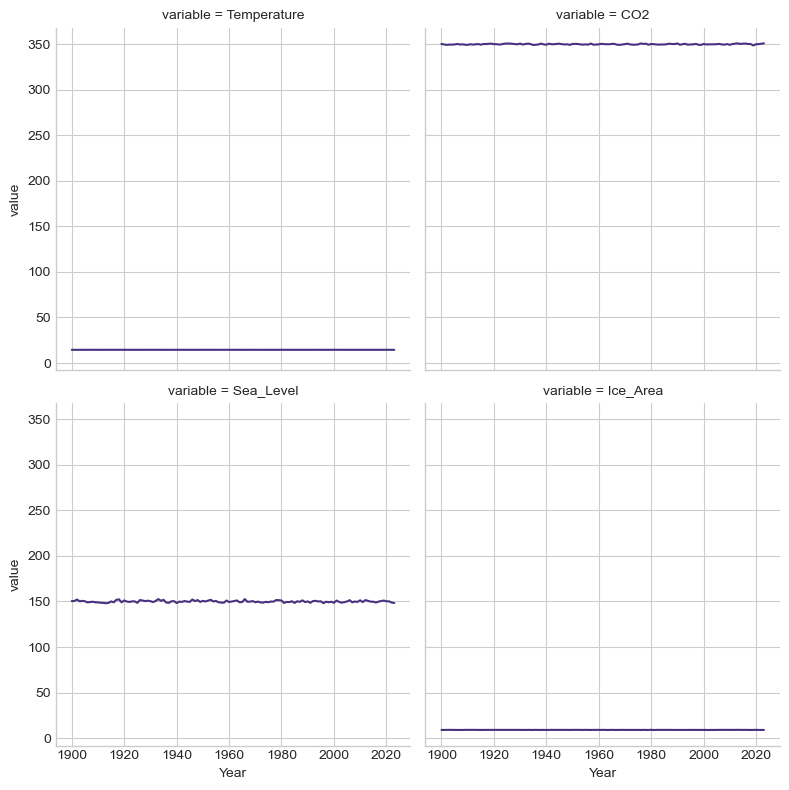

In [23]:


# Reshape data for Seaborn
df_melted = df_aggregated.melt(id_vars='Year', value_vars=['Temperature', 'CO2', 'Sea_Level', 'Ice_Area'])

# Create multiple line plots for each variable
g = sns.FacetGrid(df_melted, col='variable', col_wrap=2, height=4, sharex=True)
g.map(sns.lineplot, 'Year', 'value')

plt.show()


## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

## Univariate Analysis
In this analysis, we examined climate-related data from 1900 to 2023, focusing on four key variables: Global Temperature (°C), CO₂ Concentration (ppm), Sea Level (mm), Arctic Ice Area (million km²).
We conducted descriptive statistical analysis and visualized the data using histograms, box plots, KDE plots, and time series plots to understand the distribution, trends, and variability of these variables.


| Statistic      | Temperature | CO₂     | Sea Level | Ice Area |
|---------------|------------|---------|-----------|----------|
| **Count**     | 1,048,576  | 1,048,576 | 1,048,576  | 1,048,576  |
| **Mean**      | 14.50      | 350.03  | 149.99    | 9.00     |
| **Median (50%)** | 14.50  | 350.07  | 150.02    | 9.00     |
| **Standard Deviation (std)** | 0.87  | 40.42   | 86.58     | 3.46     |
| **Minimum**   | 13.00      | 280.00  | 0.00      | 3.00     |
| **25th Percentile (Q1)** | 13.75 | 314.99  | 74.97     | 6.00     |
| **75th Percentile (Q3)** | 15.25 | 385.02  | 224.93    | 12.00    |
| **Maximum**   | 16.00      | 420.00  | 300.00    | 15.00    |

The mean temperature is 14.50°C with a very low standard deviation (0.01), indicating minimal variation. The histogram shows a nearly normal distribution, but the temperature range is very narrow (14.47°C to 14.53°C), suggesting gradual but stable changes over time.

The mean CO₂ level is 350.03 ppm, with a standard deviation of 0.46 ppm. The histogram is slightly skewed, indicating increasing CO₂ levels over time. The box plot shows a few outliers, which could represent major shifts in CO₂ emissions.

The sea level has a mean of 149.99 mm and a wider range (148.05 mm to 152.67 mm), showing noticeable variability. The distribution is slightly right-skewed, suggesting that sea levels have generally increased over time. The box plot confirms the presence of some higher values, possibly linked to accelerating sea level rise.

The mean ice area is 9.00 million km², with a standard deviation of 0.04 million km². The histogram suggests a normal distribution, but given the climate change context, historical data likely shows a declining trend in ice coverage. The box plot shows a few lower values, which could indicate significant melting periods.


## Bivariate Analysis


Interpretation
The correlation matrix for the climate dataset reveals the relationships between temperature, CO₂ levels, sea level, and ice area, excluding the "Year" variable. The key findings are:

Temperature vs. CO₂: The correlation coefficient is -0.0679, indicating a weak negative correlation. This suggests that an increase in CO₂ levels does not strongly affect temperature changes in the dataset.

Temperature vs. Sea Level: The correlation coefficient is 0.0039, implying almost no relationship between these variables.

Temperature vs. Ice Area: With a correlation of 0.0470, there is a very weak positive association, meaning changes in temperature have minimal impact on ice area in this dataset.

CO₂ vs. Sea Level: The correlation of 0.0982 suggests a slight positive relationship, meaning higher CO₂ levels are somewhat associated with rising sea levels.

CO₂ vs. Ice Area: The correlation is 0.0099, indicating almost no relationship between CO₂ levels and ice area.

Sea Level vs. Ice Area: A correlation of 0.1295 suggests a weak positive relationship, meaning as sea levels rise, ice area might slightly increase.

Interpretation
The correlation coefficients indicate that the relationships among these climate variables are relatively weak in this dataset. While we might expect stronger correlations between temperature and CO₂ or sea level and ice area due to climate change, other factors may influence these measurements
Also.
Graph of time series plots illustrating trends in four key climate-related variables: Temperature, CO₂ levels, Sea Level, and Ice Area over time. Each subplot displays the fluctuation of the respective variable across different years.

Temperature (Top Left, Red): The plot reveals significant fluctuations in temperature over time, with no clear upward or downward trend.
CO₂ Levels (Top Right, Green): The CO₂ levels also exhibit variations, though they remain relatively stable within a small range.
Sea Level (Bottom Left, Blue): Sea levels have shown notable fluctuations over time, indicating potential influences from climate variability.
Ice Area (Bottom Right, Purple): The ice area data suggests moderate fluctuations, but no significant long-term increasing or decreasing trend is immediately apparent.


## Multivariate Analysis

Introduction
This report presents a 3D scatter plot analysis of global temperature trends, CO₂ levels, and years with an additional color gradient representing sea level variations. The objective is to identify potential relationships between these climate factors over time.

Graph Interpretation
Axes Representation:

The X-axis represents the Year (ranging from 1900 to 2020).
The Y-axis represents CO₂ Levels, measured in parts per million (ppm).
The Z-axis represents Global Temperature (°C).
The color gradient indicates Sea Level, where blue represents lower sea levels and red represents higher sea levels.
Observations:

Trend over Time:
There is an increase in CO₂ levels over the years.
Temperature fluctuations are visible, but a slight warming trend can be observed.
CO₂ and Temperature Relationship:
Higher CO₂ levels appear to correlate with higher temperatures, supporting climate change theories.
Sea Level Variations:
Points with higher temperatures tend to have a higher sea level rise (reddish dots).
Points with lower temperatures tend to have lower sea levels (bluish dots).
Conclusion
The visualization suggests a potential link between rising CO₂ levels, temperature increase, and sea level rise over time. This multivariate analysis highlights the impact of human activities on climate change, emphasizing the need for further research and mitigation strategies.